In [48]:
import math
import copy
from tqdm import tqdm

import numpy as np
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
import plotly.offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sbemdb import SBEMDB
from cleandb import clean_db, clean_db_uct

from distance import distance
from findpath import find_path

import mapping 

In [49]:
db = SBEMDB()
db = clean_db(db) 
x,y,z = db.segments(444)
mp = mapping.Mapping()

trees Before 398
trees After 46
nodes Before 37481
nodes After 16320
nodecons Before 73994
nodecons After 32548
syncons Before 1199
syncons After 826
synapses Before 552
synapses After 535


# Old

In [50]:
node_ids_db = list(db.nodeDetails('tid==444 and typ=6').keys())
segments = pd.read_csv('segments_table.csv')
segments.head()

,segment_id,branch_id,type,depth,is_synapse,node_id,point_node_id
0,0,2137,main,0,False,2137,2137
1,0,2137,main,0,False,3477,2137
2,0,2137,main,0,False,3478,3477
3,0,2137,main,0,False,3479,3478
4,0,2137,main,0,False,3480,3479


In [51]:
node_neighbors = {}
segment_ids = segments['segment_id'].unique()
for i in range(len(segment_ids)):
    sub_data = segments[segments['segment_id'] == segment_ids[i]]
    #first_node_id = sub_data.iloc[-1]['node_id']
    for i in range(len(sub_data)):
        node_id = sub_data.iloc[i]['node_id']
        node_id2 = sub_data.iloc[i]['point_node_id']
        if node_id not in node_neighbors:
            node_neighbors[node_id] = []
        if node_id2 not in node_neighbors:
            node_neighbors[node_id2] = []
        if node_id != node_id2:
            node_neighbors[node_id].append(node_id2)
            node_neighbors[node_id2].append(node_id)

In [53]:
counts = {}
for i in range(1500):
    df = segments[segments['segment_id'] == i]
    if not df.empty:
        branching_node = df['node_id'].iloc[-1]
        pointing_nodes = segments[segments['point_node_id'] == branching_node]['segment_id'].values        
        c = len(pointing_nodes)
        counts[c] = counts.get(c, 0) + 1
counts_x = []
for i in range(8):
    counts_x.append(counts.get(i, 0))

# new

In [54]:
node_ids_db = list(db.nodeDetails('tid==444 and typ=6').keys())
segments = pd.read_csv('segments_table_dw.csv')
segments.head()

,segment_id,branch_id,type,depth,is_synapse,node_id,point_node_id
0,0,0,main,0,False,3477,2137
1,0,0,main,0,False,3478,3477
2,0,0,main,0,False,3479,3478
3,0,0,main,0,False,3480,3479
4,0,0,main,0,False,3481,3480


In [55]:
node_neighbors = {}
segment_ids = segments['segment_id'].unique()
for i in range(len(segment_ids)):
    sub_data = segments[segments['segment_id'] == segment_ids[i]]
    #first_node_id = sub_data.iloc[-1]['node_id']
    for i in range(len(sub_data)):
        node_id = sub_data.iloc[i]['node_id']
        node_id2 = sub_data.iloc[i]['point_node_id']
        if node_id not in node_neighbors:
            node_neighbors[node_id] = []
        if node_id2 not in node_neighbors:
            node_neighbors[node_id2] = []
        if node_id != node_id2:
            node_neighbors[node_id].append(node_id2)
            node_neighbors[node_id2].append(node_id)

In [58]:
counts_new = {}
for i in range(1500):
    df = segments[segments['segment_id'] == i]
    if not df.empty:
        branching_node = df['node_id'].iloc[-1]
        pointing_nodes = segments[segments['point_node_id'] == branching_node]['segment_id'].values        
        c = len(pointing_nodes)
        counts_new[c] = counts.get(c, 0) + 1
counts_new_x = []
for i in range(8):
    counts_new_x.append(counts_new.get(i, 0))

In [65]:
print(counts_new, counts)
print(counts_new_x, counts_x)

{2: 36, 3: 151, 5: 6, 4: 21, 0: 2} {0: 1, 4: 20, 3: 150, 2: 35, 5: 5, 7: 1}
[2, 0, 36, 151, 21, 6, 0, 0] [1, 0, 35, 150, 20, 5, 0, 1]


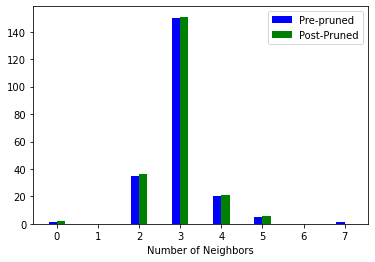

In [69]:
x = np.arange(8)
w = 0.2
ax = plt.subplot(111)
plt.xticks(x + w /2, ['0','1', '2', '3', '4', '5', '6', '7'])
ax.bar(x, counts_x, width=0.2, color='b', align='center')
ax.bar(x + w, counts_new_x, width=0.2, color='g', align='center')
plt.legend(['Pre-pruned', 'Post-Pruned'])
plt.xlabel('Number of Children')
plt.show()

# analyzing new csv

In [61]:
rootlen, islen, tslen = len(segments[segments['type'] == 'root']), len(segments[segments['type'] == 'is']), len(segments[segments['type'] == 'ts'])
rootlen, islen, tslen

(31, 2702, 2633)

In [62]:
segments2 = pd.read_csv('segments_table.csv')
rootlen2, islen2, tslen2 = len(segments2[segments2['type'] == 'root']), len(segments2[segments2['type'] == 'is']), len(segments2[segments2['type'] == 'ts'])
rootlen2, islen2, tslen2

(234, 3903, 2022)

<BarContainer object of 3 artists>

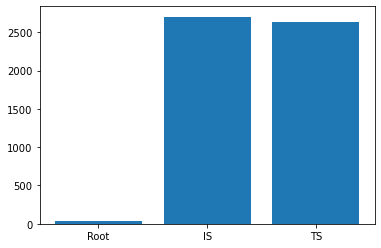

In [63]:
plt.bar(x=range(3), height=[rootlen, islen, tslen], tick_label= ['Root', 'IS', 'TS'])
#updated segments

<BarContainer object of 3 artists>

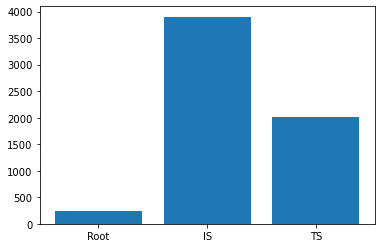

In [64]:
plt.bar(x=range(3), height=[rootlen2, islen2, tslen2], tick_label= ['Root', 'IS', 'TS'])
#original segments